<a href="https://colab.research.google.com/github/RheedWhan/Employee-Churn/blob/main/Employee_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model Building and Selection

In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('/content/hr_employee_churn_data.csv')
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
# Duplicate dataset
df1 = df.copy()

In [6]:
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [7]:
# Drop the 'empid' column because we do not need it
df1 = df1.drop('empid', axis=1)

In [8]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [9]:
# Check the missing value
df1.isna().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [10]:
# Fill the missing values
sat_lvl_mean = df1['satisfaction_level'].mean()

df1['satisfaction_level'].fillna(sat_lvl_mean, inplace=True)

In [11]:
# Check again if there is any missing value
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [12]:
df1['salary'].value_counts() # Checking the number of elements for each distint value in the column

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
# Handle the categorical data using get dummies
salary_dummies = pd.get_dummies(df['salary'], drop_first=False)

In [14]:
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [15]:
# Join the salary dummies data to the main dataset
df1 = pd.concat([df1, salary_dummies], axis=1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,0,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,0,1
3,0.72,0.87,5,223,5,0,0,low,1,0,1,0
4,0.37,0.52,2,159,3,0,0,low,1,0,1,0


In [16]:
# Drop the salary column because we do not need it anymore
df1 = df1.drop('salary', axis=1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,1,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,1,0


### Split Dataset into Training set and Test set

In [17]:
# Split the dataset into features and label
X = df1.drop(labels='left', axis=1)
y = df1['left']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [19]:
len(X_train)

11999

In [20]:
len(X_test)

3000

### Model Selection

In [21]:
# Create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [22]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [23]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9171279093031011,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 130}},
 {'model': 'XGBClassifier',
  'best_score': 0.9909995554073581,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

### Model Building

In [24]:
# From the above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)

In [25]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
model_xgb.score(X_test,y_test)

0.9876666666666667

In [27]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
6723,0.65,0.96,5,226,2,1,0,0,0,1
6473,0.88,0.80,3,166,2,0,0,0,1,0
4679,0.69,0.98,3,214,2,0,0,0,1,0
862,0.41,0.47,2,154,3,0,0,0,1,0
7286,0.87,0.76,5,254,2,1,0,0,1,0


In [28]:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
6723,0.65,0.96,5,226,2,1,0,0,0,1


In [29]:
model_xgb.predict(X_test[:1])

array([0])

In [30]:
df.loc[6723]

empid                      6724
satisfaction_level         0.65
last_evaluation            0.96
number_project                5
average_montly_hours        226
time_spend_company            2
Work_accident                 1
promotion_last_5years         0
salary                   medium
left                          0
Name: 6723, dtype: object

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[2284,   10],
       [  27,  679]])

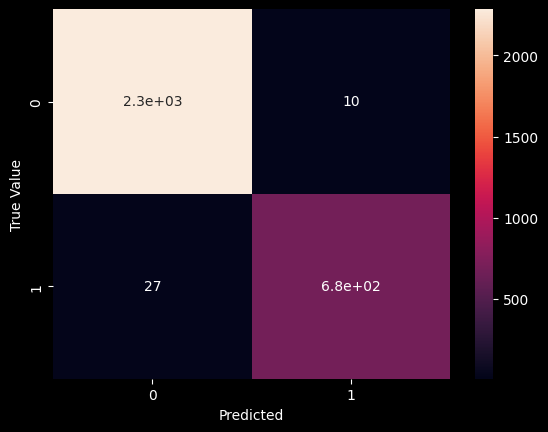

In [36]:
# Plot the graph
plt.style.use("dark_background")
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()